# [Reconnaissance de caractères manuscrits](https://github.com/wikistat/Ateliers-Big-Data/2-MNIST) ([MNIST](http://yann.lecun.com/exdb/mnist/)) en <a href="https://www.python.org/"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Python_logo_and_wordmark.svg/390px-Python_logo_and_wordmark.svg.png" style="max-width: 120px; display: inline" alt="Python"/></a> avec <a href="https://keras.io/"><img src="https://s3.amazonaws.com/keras.io/img/keras-logo-2018-large-1200.png" style="max-width: 100px; display: inline" alt="Keras"/></a>

##  Introduction

### Objectif
Même traitement sur les mêmes données cette fois avec la librairies Keras de Python.

### Importation des librairies

In [13]:
# PLOT
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()


import pandas as pd
import numpy as np
import time

import keras.utils as ku
import keras.models as km
import keras.layers as kl
import keras.optimizers as ko

from sklearn.metrics import confusion_matrix

### Lecture des données d'apprentissage et de test


Les données peuvent être préalablement téléchargées ou directement lues. Ce sont celles originales du site [MNIST DataBase](http://yann.lecun.com/exdb/mnist/) mais préalablement converties au format .csv, certes plus volumineux mais plus facile à lire. Attention le fichier `mnist_train.zip` présent dans le dépôt est compressé. 



In [2]:
# Lecture des données d'apprentissage
N_classes = 10

# path="" # Si les données sont dans le répertoire courant sinon:
path="DIRECTION_DU_DOSSIER_AVEC_LES_DONNEES_MNIST"
Dtrain=pd.read_csv(path+"mnist_train.csv",header=None)
X_train = Dtrain.values[:,:-1]
Y_train = Dtrain.values[:,-1]

Dtest=pd.read_csv(path+"mnist_test.csv",header=None)
X_test = Dtest.values[:,:-1]
Y_test = Dtest.values[:,-1]


Avec Keras, la variable de réponse doit être une matrice binaire ou chaque classe est représenté par une colonne. Pour chaque individu, l'élément de la colone correspondant à la classe à laquelle il appartient est à 1, sinon il est à 0. 

Keras possède une fonction `to_catergorical` permettant de convertir directement le vecteur de variable `Y_train`, de réponse en Matrice binaire `Y_train_cat`.

In [3]:
Y_train_cat = ku.to_categorical(Y_train, N_classes)
Y_test_cat = ku.to_categorical(Y_test, N_classes)

## Apprentissage et prévision du test

### MLP Classifier
On tente d'abord d'appliquer un réseaux de neurone MultiPerceptron classique constitué de 4 couches : 
* Dense :52 neurones + Foncton d'activation "relu"
* Dropout : 20% des neurones tiré aléatoirement sont desactivés
* Dense :52 neurones + Foncton d'activation "relu"
* Dropout : 20% des neurones tiré aléatoirement sont desactivés

Une couche softmax permettant la classification

#### Apprentissage

In [4]:
batch_size = 128
epochs = 20

model = km.Sequential()
model.add(kl.Dense(512, activation='relu', input_shape=(784,)))
model.add(kl.Dropout(0.2))
model.add(kl.Dense(512, activation='relu'))
model.add(kl.Dropout(0.2))
model.add(kl.Dense(N_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=ko.RMSprop(),
              metrics=['accuracy'])

ts = time.time()
history = model.fit(X_train, Y_train_cat,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, Y_test_cat))
te = time.time()
t_train_mpl = te-ts

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s - loss: 11.5899 - acc: 0.

#### Résultats

Les résultats sont assez médiocres puisque l'on obtient seulement 19,33% d'images bien classée. 

In [5]:
score_mpl = model.evaluate(X_test, Y_test_cat, verbose=0)
predict_mpl = model.predict(X_test)
print('Test loss:', score_mpl[0])
print('Test accuracy:', score_mpl[1])
print("Time Running: %.2f seconds" %t_train_mpl )
pd.DataFrame(confusion_matrix(Y_test, predict_mpl.argmax(1)))


Test loss: 9.87033765717
Test accuracy: 0.3876
Time Running: 122.61 seconds


,0,1,2,3,4,5,6,7,8,9
0,0,2,500,0,0,477,0,1,0,0
1,0,1126,8,0,0,1,0,0,0,0
2,0,15,1003,0,0,6,0,8,0,0
3,0,102,313,0,0,549,0,46,0,0
4,0,98,336,0,0,58,0,490,0,0
5,0,30,40,0,0,811,0,11,0,0
6,0,40,833,0,0,83,0,2,0,0
7,0,45,46,0,0,1,0,936,0,0
8,0,256,407,0,0,238,0,73,0,0
9,0,45,92,0,0,34,0,838,0,0


### MLP With normalized Data

On refait tourner le modèle à l'identique, mais on normalise les données par leur valeurs maximal (ici 255).

#### Apprentissage

In [6]:
batch_size = 128
epochs = 20

X_train_norm = X_train/255
X_test_norm = X_test/255

model = km.Sequential()
model.add(kl.Dense(512, activation='relu', input_shape=(784,)))
model.add(kl.Dropout(0.2))
model.add(kl.Dense(512, activation='relu'))
model.add(kl.Dropout(0.2))
model.add(kl.Dense(N_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=ko.RMSprop(),
              metrics=['accuracy'])

ts=time.time()
history = model.fit(X_train_norm, Y_train_cat,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test_norm, Y_test_cat))
te=time.time()
t_train_mpl_norm = te-ts


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s - loss: 0.2447 - acc: 0.9

#### Résultats

Le résultat est cette fois de 98% d'image bien classé!

In [7]:
score_mpl_norm = model.evaluate(X_test, Y_test_cat, verbose=0)
predict_mpl_norm = model.predict(X_test)
print('Test loss:', score_mpl_norm[0])
print('Test accuracy:', score_mpl_norm[1])
print("Time Running: %.2f seconds" %t_train_mpl_norm )
pd.DataFrame(confusion_matrix(Y_test, predict_mpl_norm.argmax(1)))

Test loss: 0.267966339141
Test accuracy: 0.9833
Time Running: 121.06 seconds


,0,1,2,3,4,5,6,7,8,9
0,973,1,0,0,1,0,3,2,0,0
1,0,1129,2,0,0,0,2,0,2,0
2,4,1,1008,3,3,0,2,6,4,1
3,2,0,1,990,0,4,0,6,3,4
4,2,0,1,0,969,0,4,3,1,2
5,2,0,0,7,1,872,4,1,3,2
6,5,2,0,1,5,3,941,0,1,0
7,2,1,6,1,1,0,0,1015,2,0
8,4,1,1,1,2,2,1,4,955,3
9,1,4,0,0,12,4,0,5,2,981


### Convolutional Network

Nous allons maintenant tester un réseau de convolution constitué de 7 couches: 

* Une couche de convolution 2D, avec une fenêtre de convolution de taille 3x3 avec une fonction d'activation de type "relu"
* Une couche de convolution 2D, avec une fenêtre de convolution de taille 3x3 avec une fonction d'activation de type "relu"
* Une couche max pooling de fenêtre 2x2
* Une couche dropout ou 25% des neurones sont desactivés
* Une couche "Flatten" permetant de "remettre  à plat" les images de taille NxN en vecteur de tailles N^2.
* Une couche de 128 neurones classiques.
* Une couche dropout ou 50% des neurones sont desactivés

Une couche softmax permettant la classification

#### Format des données

Dans les exemples précédents. Les données était "applatis". C'est à dire qu'on considérait les 28x28=784 pixels des images comme un vecteur. 

Pour pouvoir utiliser les principes de la convolution on doit garder la structure des images et considérer les images, non pas comme un vecteur de tailles 784x1 mais comme une matrice de taille 28x28. Ainsi `X_train` sera doit être re organiser de manière à ce qu'il soit de dimension 60000x28x28 pour être utilisé dans un réseau de convolution.

Avec **Keras** `X_train` doit même être de taille 60000x28x28x1. La dernière dimension, de taille 1 peut paraitre inutile. Elle l'est dans le cas des données *MNIST* car les pixels ne sont décrites qu'avec un seul niveau de gris. 
Cependant, des images en couleurs décrites avec le système RGB sont décrites avec trois niveau d'intensités (Rouge, Vert et Bleus) et serait ainsi de dimension N_individiusxN_lignexN_ColonnexN_niveau d'intensité. C'est pour cela qu'une quatrième dimension est nécessaire pour décrire toutes sortes d'images. 

On notera également qu'en utilisant des couches de convolution, il n'est pas nécessaire de normaliser au préalable les données.

In [8]:
X_train_conv = X_train.reshape(60000, 28, 28, 1)
X_test_conv = X_test.reshape(10000, 28, 28, 1)

#### Apprentissage

In [9]:
model = km.Sequential()
model.add(kl.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28, 1), data_format="channels_last"))
model.add(kl.Conv2D(64, (3, 3), activation='relu'))
model.add(kl.MaxPooling2D(pool_size=(2, 2)))
model.add(kl.Dropout(0.25))
model.add(kl.Flatten())
model.add(kl.Dense(128, activation='relu'))
model.add(kl.Dropout(0.5))
model.add(kl.Dense(N_classes, activation='softmax'))

model.summary()

model.compile(loss="categorical_crossentropy",
              optimizer=ko.Adadelta(),
              metrics=['accuracy'])

ts=time.time()
model.fit(X_train_conv, Y_train_cat,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test_conv, Y_test_cat))
te=time.time()
t_train_conv = te-ts


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
__________

#### Résultats

In [10]:
score_conv = model.evaluate(X_test_conv, Y_test_cat, verbose=0)
predict_conv = model.predict(X_test_conv)
print('Test loss:', score_conv[0])
print('Test accuracy:', score_conv[1])
print("Time Running: %.2f seconds" %t_train_conv )
pd.DataFrame(confusion_matrix(Y_test, predict_conv.argmax(1)))

Test loss: 0.0307786193048
Test accuracy: 0.991
Time Running: 2200.08 seconds


,0,1,2,3,4,5,6,7,8,9
0,975,0,2,0,0,0,1,1,1,0
1,0,1131,1,1,0,1,0,1,0,0
2,1,1,1024,0,0,0,0,5,1,0
3,0,0,0,1007,0,2,0,0,1,0
4,0,0,0,0,974,0,1,0,2,5
5,1,0,0,5,0,883,3,0,0,0
6,6,4,0,0,1,5,939,0,3,0
7,0,2,5,1,0,0,0,1018,1,1
8,2,0,1,1,1,0,0,1,966,2
9,0,2,0,3,5,3,0,0,3,993


## Summary

In [11]:
dataframeErreur1 = pd.read_csv("/Users/bguillouet/Insa/TP_Insa/data/data_erreur_mnist_scikit_learn_100_trees.csv")
score_RF_100 = dataframeErreur1["Erreur"].values[-1]
temps_RF_100 = dataframeErreur1["Temps"].values[-1]
dataframeErreur= pd.read_csv("/Users/bguillouet/Insa/TP_Insa/data/data_erreur_mnist_scikit_learn_250_trees.csv")
score_RF_250 = dataframeErreur["Erreur"].values[-1]
temps_RF_250 = dataframeErreur["Temps"].values[-1]


/Users/bguillouet/anaconda/envs/DeepLearning/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


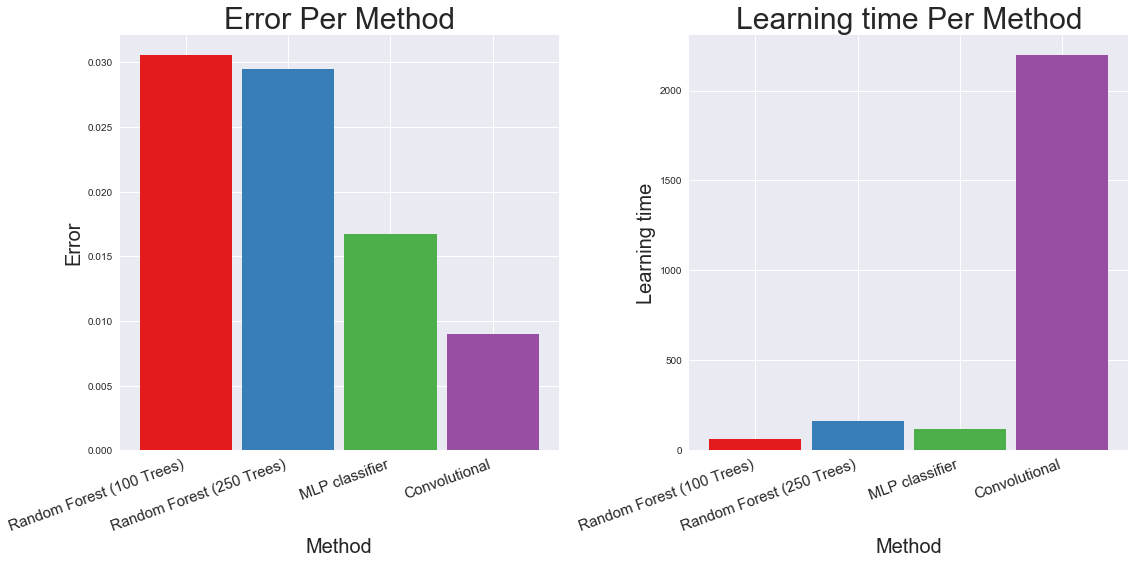

In [14]:
cmap = plt.get_cmap("Set1")
color = [cmap(i) for i in range(4)]
index = np.arange(4)


fig = plt.figure(figsize=(16,8))

ax = fig.add_subplot(1,2,1)
y_score = [score_RF_100, score_RF_250, 1-score_mpl_norm[1], 1-score_conv[1]]
rects = ax.bar(index, y_score, 0.9, color=color)
ax.set_xlabel('Method',fontsize=20)
ax.set_ylabel('Error',fontsize=20)
ax.set_title('Error Per Method', fontsize=30)
ax.set_xticks(index)
ax.set_xticklabels(('Random Forest (100 Trees)', 'Random Forest (250 Trees)', 'MLP classifier', 'Convolutional'), 
                   fontsize=15, rotation=20, ha="right")

ax2 = fig.add_subplot(1,2,2)
y_temps = [temps_RF_100, temps_RF_250, t_train_mpl_norm, t_train_conv]
rects = ax2.bar(index, y_temps, 0.9, color=color)
ax2.set_xlabel('Method',fontsize=20)
ax2.set_ylabel('Learning time',fontsize=20)
ax2.set_title('Learning time Per Method', fontsize=30)
ax2.set_xticks(index)
ax2.set_xticklabels(('Random Forest (100 Trees)', 'Random Forest (250 Trees)', 'MLP classifier', 'Convolutional'), 
                    fontsize=15, rotation=20, ha="right")
ax2.legend()

fig.tight_layout()
plt.show()